In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

(array([ 8., 19., 23., 20., 13.,  4.,  4.,  3.,  3.,  1.,  1.,  0.,  0.,
         0.,  1.]),
 array([  34.        ,  394.33333333,  754.66666667, 1115.        ,
        1475.33333333, 1835.66666667, 2196.        , 2556.33333333,
        2916.66666667, 3277.        , 3637.33333333, 3997.66666667,
        4358.        , 4718.33333333, 5078.66666667, 5439.        ]),
 <BarContainer object of 15 artists>)

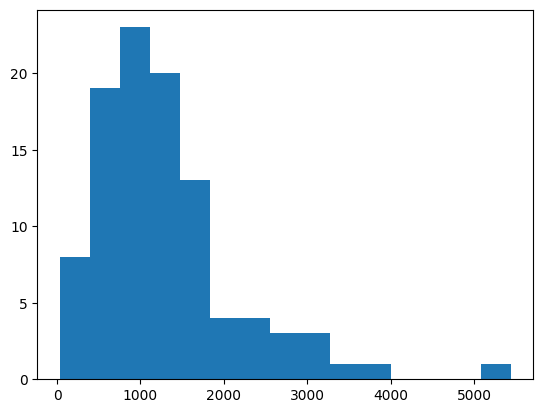

In [14]:
import pandas as pd
datos = pd.read_csv('/content/sample_data/california_housing_train.csv', delimiter=',')
n = 100
sample_data = datos['population'].sample(n=n)
sample = sample_data.values
plt.hist(sample,bins='auto')

Hace algunas clases vimos que si estimamos la distribución de los datos $F$ con la distribución empírica $\hat{F_n}$, podemos estimar cualquier funcional estadístico con su contraparte muestral.

Particularmente, el estimador del estadístico **media** $T(F) = \mu$ es el promedio muestral: $$\hat{\mu} = \bar{X_n} = \frac{1}{n}\sum_{i=1}^{n}X_i$$ y podemos calcular facilmente su desvío estándar, ya que es el error estándar del promedio muestral:


$$\text{se}(\hat{\mu}) = \sqrt{\text{var}(\bar{X_n})} = \frac{\sigma}{\sqrt{n}} $$

donde $\sigma$ es el desvío estándar de $X\sim F$. Por lo tanto, para estimar $\text{se}(\hat{\mu})$, reemplazamos $\sigma$ por $\hat{\sigma} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X_n})^{2}}$, el desvío estándar muestral.

También podemos estimar un intervalo de confianza de nivel $1-\alpha$ para $\hat{\mu}$ como
$$\hat{\text{IC}}(\mu) = \hat{\mu} \pm z_{\frac{\alpha}{2}}\hat{\text{se}}(\hat{\mu}) $$

In [15]:
mean = np.mean(sample) #Calculo el promedio muestral
std = np.std(sample) #Calculo el desvío estándar muestral
se_mean = std/np.sqrt(n) #Calculo el error estándar del promedio muestral


#Calculo el intervalo de confianza asintótico para la media
alpha = 0.05
low = mean - stats.norm.ppf(1-alpha/2)*se_mean
up = mean + stats.norm.ppf(1-alpha/2)*se_mean

print('µ =',mean)
print('se(µ) =',se_mean)
print('IC(µ) = ',[low,up])

µ = 1290.53
se(µ) = 86.7309834545879
IC(µ) =  [1120.5403960852684, 1460.5196039147315]


Ahora, ¿cómo calculo el error estándar y los intervalos de confianza para otros estadísticos?

# Bootstrap

Recordemos que estamos estimando la distribución subyacente a los datos $F$ con la función de distribución empírica $\hat{F_n}$. Como $\hat{F_n}$ le asigna una probabilidad puntual $1/n$ a cada $X_i$,
$\Rightarrow$
**tomar una observación de $\hat{F_n}$ equivale a tomar una observación al azar de la muestra original $X_1,...,X_n$**.

Entonces el método de bootstrap es simplemente seguir los siguientes pasos:



1.   Simulo una muestra $X_1^{*},...,X_n^{*} \sim \hat{F_n}$ tomando $n$ observaciones con reemplazo de $X_1,...,X_n$
2.   Calculo el funcional estadístico muestral deseado $T^{*}(\hat{F_n})$ a partir de $X_1^{*},...,X_n^{*}$
3. Repito **1.** y **2.** $m$ veces. Obtengo una muestra de $m$ valores de $T^{*}(\hat{F_n})$
4. Un estimador de la varianza de $\hat{\theta}_n = T(\hat{F_n})$ es la varianza muestral de $T^{*}(\hat{F_n})_m$. Es decir,

$$ v_{boot} (\hat{\theta}_n) = \frac{1}{m}\sum_{j=1}^{m} (T^{*}_{n,j} - \frac{1}{m}\sum_{i=1}^{m} T^{*}_{n,i} )^2$$
y
$$\hat{\text{se}} = \text{se}_{boot} =  \sqrt{v_{boot}}$$

5. A partir de la muestra de bootstrap podemos estimar un intervalo de confianza para $T(F)$ de varias maneras

## Intervalos de confianza

de nivel $1-\alpha$ para el estimador de un estadístico $\hat{\theta}_n$


---



1. Intervalo normal: $$\text{IC} = \hat{\theta}_n \pm z_{\frac{\alpha}{2}}\text{se}_{boot}$$


2. Percentile bootstrap: $$\text{IC} = (\hat{\theta}^*_{\frac{\alpha}{2}},\hat{\theta}^*_{1-\frac{\alpha}{2}}) $$

donde $\hat{\theta}^*_{\beta}$ es el $\beta$-percentil muestral de la muestra de bootstrap de $\hat{\theta}_{n,m}$


3. Basic bootstrap (intervalo pivotal): $$\text{IC} = (2\hat{\theta}_n - \hat{\theta}^*_{1-\frac{\alpha}{2}}, 2\hat{\theta}_n - \hat{\theta}^*_{\frac{\alpha}{2}}) $$

4. BCa bootsrap (*'bias-corrected and accelerated'*).

Es el que usa ``scipy.stats`` por default. Toma un IC de percentile bootstrap y le mete un factor que depende de dos parámetros: un 'parámetro de aceleración' $a$ y un 'factor de corrección de sesgo' $z_0$, que tiene que estimar



In [16]:
#algunas características muestrales

#promedio
mean = np.mean(sample)

#varianza
var = np.var(sample)

#desvío estándar (sqrt(var))
std = np.std(sample)

#mediana
median = np.median(sample)

#cuantiles
quantile = np.quantile(sample,q = 0.25)

#asimetría: si es negativa, tiene una cola más larga a la izquierda; positiva, a la derecha
skewness = stats.skew(sample)

#correlación
sample_id = sample_data.index
sample_2 = datos.loc[sample_id, 'latitude'].values
correlation = stats.pearsonr(sample,sample_2).statistic

print('media =',mean)
print('mediana =',median)
print('std =',std)
print('25-cuartil =',quantile)
print('asimetría = ',skewness)
print('correlación con Y:latitud =',correlation)

media = 1290.53
mediana = 1119.0
std = 867.309834545879
25-cuartil = 733.5
asimetría =  1.7200874649142122
correlación con Y:latitud = -0.11744692205579618


In [17]:
sample = (sample,) #convierto la muestra en una tupla para poder aplicarle la función de bootstrap

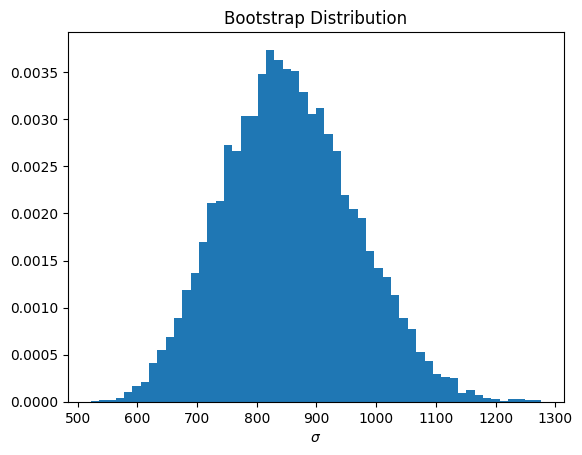

In [18]:
alpha = 0.05 #defino el nivel del IC

boot_res = stats.bootstrap(sample, np.std, confidence_level=1-alpha) #ejecuto el bootstrap


#grafico la distribución de bootstrap
fig, ax = plt.subplots()
ax.hist(boot_res.bootstrap_distribution, bins='auto',density=True)
ax.set_title('Bootstrap Distribution')
ax.set_xlabel(r'$\sigma$')
plt.show()

IC_normal =  [653.2898093581464, 1081.3298597336116]
IC_percentile =  [657.3299192630966, 1078.261495967341]
IC_basic =  [657.0058822364174, 1074.0720974528392]
IC_bca =  [710.2204325338673, 1208.3038492643414]


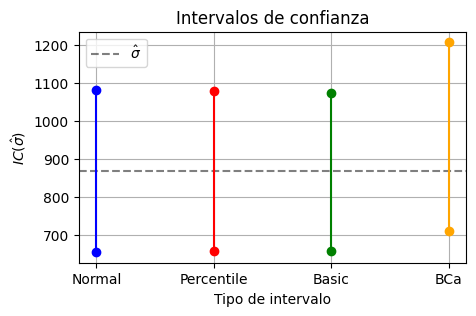

In [19]:
boot_percentile = stats.bootstrap(sample, np.std, confidence_level=1-alpha,method = 'percentile')
boot_basic = stats.bootstrap(sample, np.std, confidence_level=1-alpha,method = 'basic')
boot_bca = stats.bootstrap(sample, np.std, confidence_level=1-alpha,method = 'bca')

low_percentile = boot_percentile.confidence_interval.low
up_percentile = boot_percentile.confidence_interval.high

low_basic = boot_basic.confidence_interval.low
up_basic = boot_basic.confidence_interval.high

low_bca = boot_bca.confidence_interval.low
up_bca = boot_bca.confidence_interval.high

low_normal = std - stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error #puede ser el error estándar de cualquiera
up_normal = std + stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error



print('IC_normal = ',[low_normal,up_normal])
print('IC_percentile = ',[low_percentile,up_percentile])
print('IC_basic = ',[low_basic,up_basic])
print('IC_bca = ',[low_bca,up_bca])


plt.figure(figsize=(5, 3))
interval_names = ['Normal', 'Percentile', 'Basic', 'BCa']
plt.axhline(std,color='k',ls='--',label='$\hat{\sigma}$',alpha=0.5)
plt.plot([1, 1], [low_normal, up_normal],'o-', color='blue')
plt.plot([2, 2], [low_percentile, up_percentile],'o-', color='red')
plt.plot([3, 3], [low_basic, up_basic],'o-', color='green')
plt.plot([4, 4], [low_bca, up_bca],'o-', color='orange')
plt.xticks([1,2,3,4],labels=interval_names)
plt.xlabel('Tipo de intervalo')
plt.ylabel('$IC(\hat{\sigma})$')
plt.title('Intervalos de confianza')
plt.legend()
plt.grid()
plt.show()


### Ej 4

- $X_1,...,X_{100} \sim N(\mu,1)$
- $\theta = e^{\mu} \hspace{1cm} \hat{\theta} = e^{\bar{X}}$
- Usando $\mu = 5$ queremos obtener el error estandar y un IC de nivel 95 para $\theta$

se=  11.656702505051383
IC_normal =  [97.71248283548447, 143.40591701228155]
IC_percentile =  [99.85564462691923, 145.74818416563505]
IC_basic =  [95.825586553716, 141.56519402888216]
IC_bca =  [99.45723096552761, 144.5503063662348]


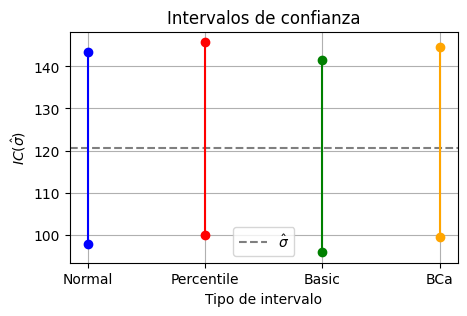

In [22]:
alpha=0.05
n=100
mu=5
norm_sample = stats.norm.rvs(size=n,loc=mu,scale=1.0)
norm_sample = (norm_sample,)

def theta_hat(sample):
  return np.exp(np.mean(sample))

boot_percentile = stats.bootstrap(norm_sample, theta_hat, confidence_level=1-alpha,method = 'percentile')
boot_basic = stats.bootstrap(norm_sample, theta_hat, confidence_level=1-alpha,method = 'basic')
boot_bca = stats.bootstrap(norm_sample, theta_hat, confidence_level=1-alpha,method = 'bca')

print('se= ',boot_percentile.standard_error)

low_percentile = boot_percentile.confidence_interval.low
up_percentile = boot_percentile.confidence_interval.high

low_basic = boot_basic.confidence_interval.low
up_basic = boot_basic.confidence_interval.high

low_bca = boot_bca.confidence_interval.low
up_bca = boot_bca.confidence_interval.high

low_normal = theta_hat(norm_sample) - stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error #puede ser el error estándar de cualquiera
up_normal = theta_hat(norm_sample) + stats.norm.ppf(1-alpha/2)*boot_percentile.standard_error

print('IC_normal = ',[low_normal,up_normal])
print('IC_percentile = ',[low_percentile,up_percentile])
print('IC_basic = ',[low_basic,up_basic])
print('IC_bca = ',[low_bca,up_bca])

plt.figure(figsize=(5, 3))
interval_names = ['Normal', 'Percentile', 'Basic', 'BCa']
plt.axhline(theta_hat(norm_sample),color='k',ls='--',label='$\hat{\sigma}$',alpha=0.5)
plt.plot([1, 1], [low_normal, up_normal],'o-', color='blue')
plt.plot([2, 2], [low_percentile, up_percentile],'o-', color='red')
plt.plot([3, 3], [low_basic, up_basic],'o-', color='green')
plt.plot([4, 4], [low_bca, up_bca],'o-', color='orange')
plt.xticks([1,2,3,4],labels=interval_names)
plt.xlabel('Tipo de intervalo')
plt.ylabel('$IC(\hat{\sigma})$')
plt.title('Intervalos de confianza')
plt.legend()
plt.grid()
plt.show()

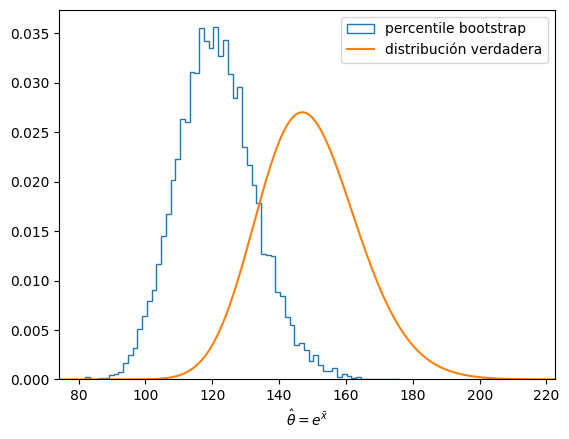

In [23]:
x = np.linspace(mu-10,mu+10,10000)
plt.hist(boot_percentile.bootstrap_distribution,density=True,bins='auto',histtype='step',label='percentile bootstrap')
norm_pdf = stats.norm.pdf(x, loc=mu, scale=np.sqrt(1/n))

plt.plot(np.exp(x),norm_pdf/np.exp(x),label='distribución verdadera')
plt.xlim(np.exp(mu)*0.5,np.exp(mu)*1.5)
plt.xlabel(r'$\hat{\theta}=e^{\bar{x}}$')
plt.legend()

¿Por qué pasa esto?